<a href="https://colab.research.google.com/github/Imajitdas7/Gold-Price-Prediction/blob/main/Gold_Price_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection And Processing

In [3]:
# Loading the csv data to a pandas Dataframe
gold_dataset=pd.read_csv('/content/gld_price_data.csv')


In [5]:
# Print First 5 rows in the dataframe
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print last 5 rows of the dataframe
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and column
gold_dataset.shape

(2290, 6)

In [9]:
# getting some basic information
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking the number of missing value
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [11]:
# statistical message on this data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

+ve correlation

-ve correlation


In [13]:
# Convert the 'Date' column to datetime objects
gold_dataset['Date'] = pd.to_datetime(gold_dataset['Date'])

# Extract numerical features for correlation calculation
numerical_features = gold_dataset.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation = numerical_features.corr()

In [18]:
print(gold_dataset)

           Date          SPX         GLD        USO      SLV   EUR/USD
0    2008-01-02  1447.160034   84.860001  78.470001  15.1800  1.471692
1    2008-01-03  1447.160034   85.570000  78.370003  15.2850  1.474491
2    2008-01-04  1411.630005   85.129997  77.309998  15.1670  1.475492
3    2008-01-07  1416.180054   84.769997  75.500000  15.0530  1.468299
4    2008-01-08  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285 2018-05-08  2671.919922  124.589996  14.060000  15.5100  1.186789
2286 2018-05-09  2697.790039  124.330002  14.370000  15.5300  1.184722
2287 2018-05-10  2723.070068  125.180000  14.410000  15.7400  1.191753
2288 2018-05-14  2730.129883  124.489998  14.380000  15.5600  1.193118
2289 2018-05-16  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


<Axes: >

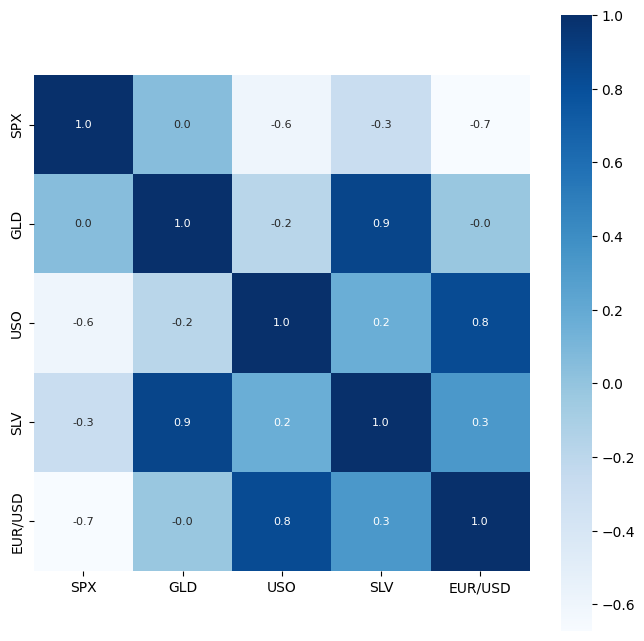

In [14]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [19]:
# correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


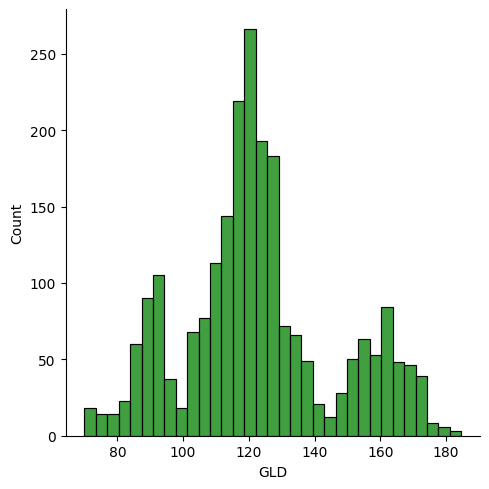

In [21]:
# checking the distribution of the GLD Price
sns.displot(gold_dataset['GLD'],color='green')

Splitting the features and Target

In [22]:
x=gold_dataset.drop(['GLD','Date'],axis=1)
y=gold_dataset['GLD']

In [24]:
print(x)
print('____________________________________________________')
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
____________________________________________________
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test data


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Model Training

Random Forest Regression

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
# Training the model
regressor.fit(x_train, y_train) # Pass x_train and y_train as separate arguments

RandomForestRegressor()

Model Evaluation

In [37]:
# prediction on Training Data
train_data_prediction = regressor.predict(x_train)


In [40]:
# R Squared Error
error_score = metrics.r2_score(y_train,train_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.9985657649495329


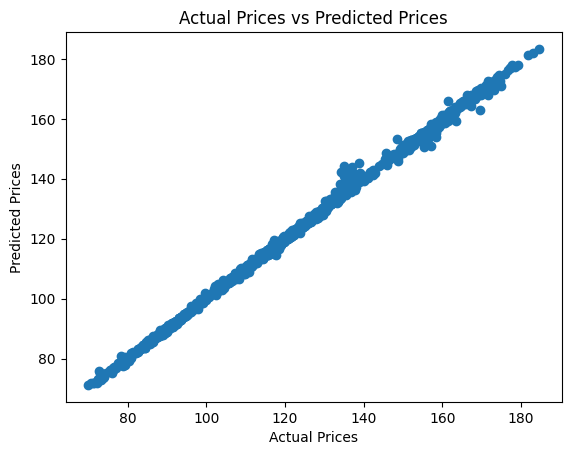

In [42]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [29]:
# prediction on Test Data
test_data_prediction = regressor.predict(x_test)

In [30]:
print(test_data_prediction)

[168.51989948  82.24889962 116.32549981 127.62060108 120.8648015
 154.66529755 150.40729884 126.02390027 117.3238988  126.02730086
 116.60790118 170.56460085 141.95529896 167.94189907 115.22910026
 117.79840043 137.66600343 170.11240128 159.03450281 157.14369923
 155.14129996 125.40150035 176.64879939 156.83600345 125.11730049
  93.76719941  77.52650006 120.58649997 119.04319923 167.53299898
  88.42209999 125.19219989  91.22050083 117.62300024 121.07839885
 136.43190112 115.68660112 115.40360068 147.76749958 107.32320093
 104.07030221  87.25599789 126.51550061 118.01580033 153.88859914
 119.64429981 108.53370016 108.29369868  93.1777005  127.10159784
  74.50260046 113.66659938 121.23790015 111.4916987  118.83689891
 120.36609941 159.5398002  167.42620085 146.87429701  85.83729866
  94.47070032  86.74959922  90.61990012 119.07240085 126.47910078
 127.64330024 169.75799954 122.16709941 117.57459893  98.45970045
 168.20700139 142.82709817 132.26220213 121.16430248 121.34299964
 119.597000

In [31]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)


R squared error :  0.9887900121013524


Compare the actual vaues and predictes values in a plot

In [32]:
y_test=list(y_test)

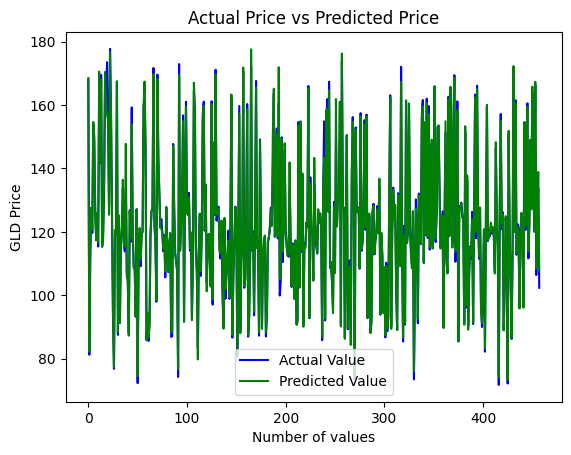

In [34]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()